## Get ready

In [1]:
from IPython.display import display, clear_output
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import tensorflow as tf 
from keras.utils import to_categorical

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import MinMaxScaler

import umap
import datetime
import os

c:\Users\emree\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Load data

##### MNIST 

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
print(f"x_train: {x_train.shape}; y_train: {y_train.shape} \nx_test: {x_test.shape}; y_test: {y_test.shape}")
print("MNIST is ready to go!")

x_train: (60000, 28, 28); y_train: (60000,) 
x_test: (10000, 28, 28); y_test: (10000,)
MNIST is ready to go!


##### Fashion MNIST

In [3]:
(x_train_fashion, y_train_fashion), (x_test_fashion, y_test_fashion) = tf.keras.datasets.fashion_mnist.load_data()
print(f"x_train: {x_train_fashion.shape}; y_train: {y_train_fashion.shape} \nx_test: {x_test_fashion.shape}; y_test: {y_test_fashion.shape}")
print(f"Fashion MNIST is ready to go!")

x_train: (60000, 28, 28); y_train: (60000,) 
x_test: (10000, 28, 28); y_test: (10000,)
Fashion MNIST is ready to go!


##### CIFAR-10

In [4]:
(x_train_cif10, y_train_cif10), (x_test_cif10, y_test_cif10) = tf.keras.datasets.cifar10.load_data()
print(f"x_train: {x_train_cif10.shape}; y_train: {y_train_cif10.shape} \nx_test: {x_test_cif10.shape}; y_test: {y_test_cif10.shape}")
print(f"CIFAR-10 is ready to go!")

x_train: (50000, 32, 32, 3); y_train: (50000, 1) 
x_test: (10000, 32, 32, 3); y_test: (10000, 1)
CIFAR-10 is ready to go!


## Give it a try with fundamental methods

##### Flatten the input data

In [5]:
x_train_flat = x_train.reshape((x_train.shape[0], -1))
x_test_flat = x_test.reshape((x_test.shape[0], -1))

print(f"x_train: {x_train_flat.shape}; y_train: {y_train.shape} \nx_test: {x_test_flat.shape}; y_test: {y_test.shape}")

x_train: (60000, 784); y_train: (60000,) 
x_test: (10000, 784); y_test: (10000,)


##### Logistic Regression

In [6]:
log_clf = LogisticRegression(random_state=42)

log_clf.fit(x_train_flat, y_train)
score_log = log_clf.score(x_test_flat, y_test)

clear_output()
print(f"Got {score_log} test accuracy with Logistic Regression!")

Got 0.9255 test accuracy with Logistic Regression!


##### K-Nearest Neighbor

In [7]:
knn = KNeighborsClassifier()

knn.fit(x_train_flat, y_train)
score_knn = knn.score(x_test_flat, y_test)

print(f"Got {score_knn} test accuracy with K-Nearest Neighbor!")

Got 0.9688 test accuracy with K-Nearest Neighbor!


##### Support Vector Machine 

In [8]:
svm = SVC(random_state=42)

svm.fit(x_train_flat, y_train)
score_svm = svm.score(x_test_flat, y_test)

print(f"Got {score_svm} test accuracy with Support Vector Machine!")

Got 0.9792 test accuracy with Support Vector Machine!


## Preprocessing

##### Scaling and Encoding

In [9]:
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train_flat)
x_test_scaled = scaler.transform(x_test_flat)

n_classes = len(np.unique(y_train))
y_train_encoded = to_categorical(y_train, n_classes)
y_test_encoded = to_categorical(y_test, n_classes)

print("The preprocessed data is in shape:\n"
      f"x_train: {x_train_scaled.shape}; y_train: {y_train_encoded.shape} \nx_test: {x_test_scaled.shape}; y_test: {y_test_encoded.shape}")

The preprocessed data is in shape:
x_train: (60000, 784); y_train: (60000, 10) 
x_test: (10000, 784); y_test: (10000, 10)


## Dimensionality reduction

In [10]:
print("Let's see how different dimensionality reduction techniques perform.\n"
      "As we don't wanna cheat, we don't use techniques based on neural networks e.g. Autoencoder.")

Let's see how different dimensionality reduction techniques perform.
As we don't wanna cheat, we don't use techniques based on neural networks e.g. Autoencoder.


In [11]:
n_components = 2
print(f"The Input data will be reduced to {n_components} components.")

The Input data will be reduced to 2 components.


##### Principal Component Analysis (PCA)

In [12]:
pca = PCA(n_components=n_components, random_state=42)
x_train_pca = pca.fit_transform(x_train_scaled)

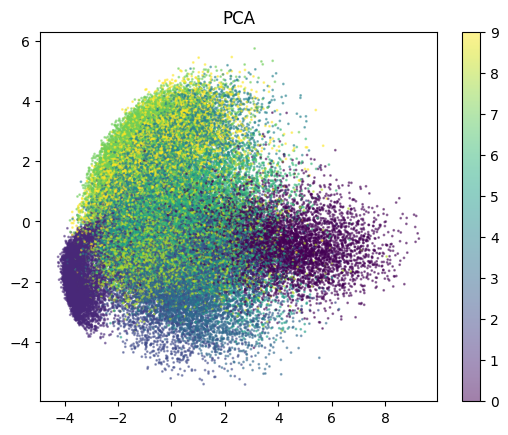

In [13]:
plt.scatter(x_train_pca[:, 0], x_train_pca[:, 1], c=y_train, cmap='viridis', alpha=0.5, s=1)
plt.title('PCA')
plt.colorbar()
plt.show()

##### Linear Discriminant Analysis (LDA) 

In [14]:
lda = LDA(n_components=n_components) 
x_train_lda = lda.fit_transform(x_train_scaled, y_train)
x_test_lda = lda.transform(x_test_scaled)

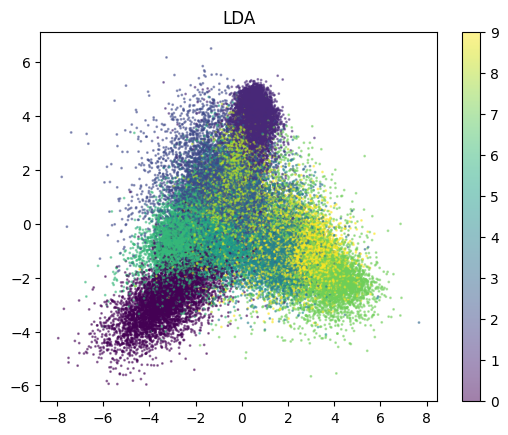

In [15]:
plt.scatter(x_train_lda[:, 0], x_train_lda[:, 1], c=y_train, cmap='viridis', alpha=0.5, s=1)
plt.title('LDA')
plt.colorbar()
plt.show()

##### Uniform Manifold Approximation and Projection (UMAP)

In [16]:
umap_model = umap.UMAP(n_components=n_components, random_state=42)
x_train_umap = umap_model.fit_transform(x_train_scaled)
x_test_umap = umap_model.transform(x_test_scaled)
clear_output()

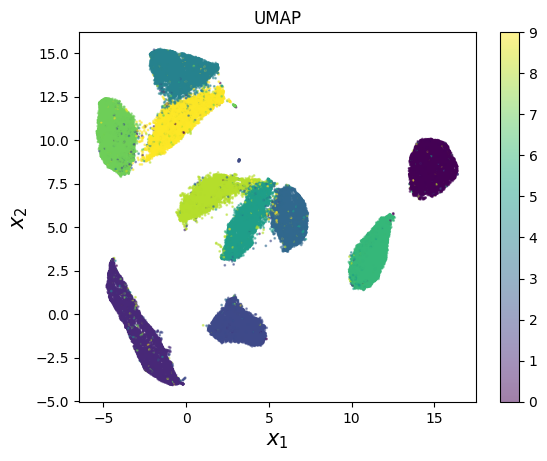

In [17]:
plt.scatter(x_train_umap[:, 0], x_train_umap[:, 1], c=y_train, cmap='viridis', alpha=0.5, s=1)
plt.title('UMAP')
plt.xlabel('$x_1$',fontsize=15)
plt.ylabel('$x_2$',fontsize=15)
plt.colorbar()
plt.show()

#### Decide for one method

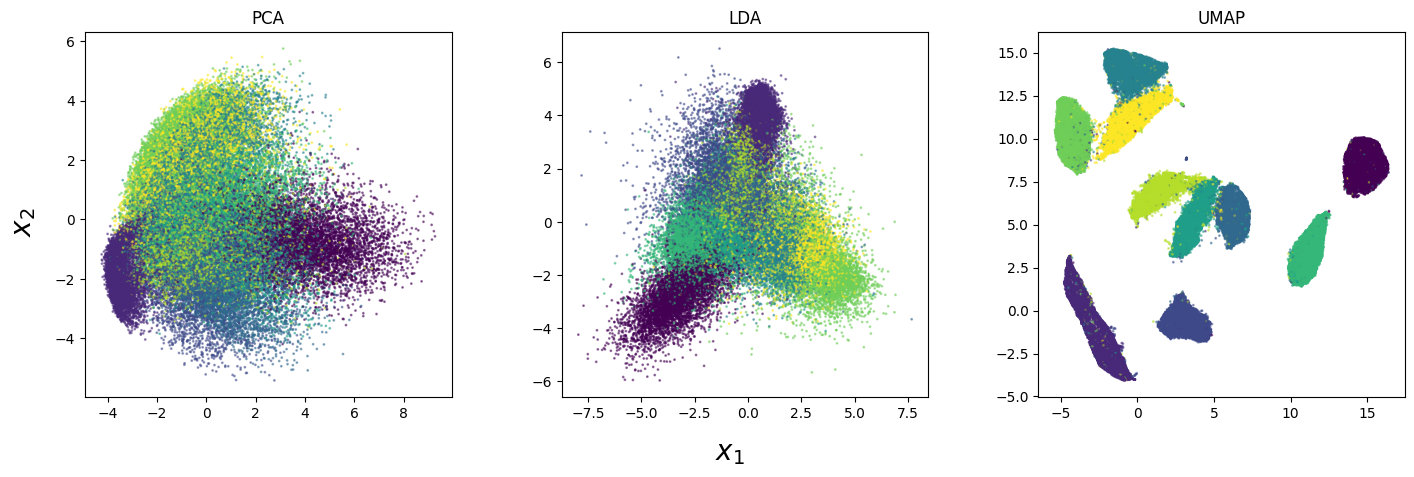

In [18]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

fig.supxlabel('$x_1$',fontsize=20)
fig.supylabel('$x_2$',fontsize=20)
fig.subplots_adjust(left=0.07, right=0.95, bottom=0.15, wspace=0.3)

axes[0].scatter(x_train_pca[:, 0], x_train_pca[:, 1], c=y_train, cmap='viridis', alpha=0.5, s=1)
axes[0].set_title('PCA')

axes[1].scatter(x_train_lda[:, 0], x_train_lda[:, 1], c=y_train, cmap='viridis', alpha=0.5, s=1)
axes[1].set_title('LDA')

axes[2].scatter(x_train_umap[:, 0], x_train_umap[:, 1], c=y_train, cmap='viridis', alpha=0.5, s=1)
axes[2].set_title('UMAP')

plt.show()

In [19]:
print("UMAP can split the classes best - we will need the data later!\n")

UMAP can split the classes best - we will need the data later!



## Pick the right image for each class

In [20]:
print("If you trust me, take the images at these indices: [39306, 45926, 35779, 9059, 3639, 29049, 15459, 26151, 56284, 1733]\n"
      "Neverthless, we will calculate them now - only for one time!")

If you trust me, take the images at these indices: [39306, 45926, 35779, 9059, 3639, 29049, 15459, 26151, 56284, 1733]
Neverthless, we will calculate them now - only for one time!


In [21]:
def calculate_mse(imageA, imageB):
	err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
	err /= float(imageA.shape[0] * imageA.shape[1])
	return err

In [22]:
def searchBestImage():
  print("Grab a cup of coffe, the calculation will take a while...")
  keep_index=[]
  mse_numbers = []

  for number in range (0,10):
    mse_number = 0.0
    filter_for_number = np.where(y_train == number)[0]
    for number1 in range (len(filter_for_number)):
      for number2 in range (len(filter_for_number)):
        mse_number += calculate_mse(x_train[filter_for_number[number1]],x_train[filter_for_number[number2]])
      mse_number = mse_number / len(filter_for_number)
      mse_numbers.append(mse_number)
    min = np.argmin(mse_numbers)
    keep_index.append(filter_for_number[min])
    mse_numbers.clear()
    filter_for_number = np.where(y_train == number )[0]

  return keep_index

In [23]:
try: 
   x_train=np.load('training_data/x_train.npy')
   y_train=np.load('training_data/y_train.npy')
   print("Filtered data for training were loaded successfully!")
except:
  keep_index=searchBestImage()
  x_train = x_train_umap[keep_index]
  y_train = y_train_encoded[keep_index]
  np.save('training_data/x_train.npy',x_train)  
  np.save('training_data/y_train.npy',y_train)
  print("Filtered data for training were saved successfully!")

x_test, y_test = x_test_umap, y_test_encoded

print("Let's check our data before training.\n"
      f"x_train: {x_train.shape}; y_train: {y_train.shape} \nx_test: {x_test.shape}; y_test: {y_test.shape}")

Filtered data for training were loaded successfully!
Let's check our data before training.
x_train: (10, 2); y_train: (10, 10) 
x_test: (10000, 2); y_test: (10000, 10)


## Define network architecture

##### Feed Forward Neural Network

In [24]:
EfficientTrillianNet = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(n_components,)),
  tf.keras.layers.Dense(10, activation='softmax')
])
EfficientTrillianNet.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 2)                 0         
                                                                 
 dense (Dense)               (None, 10)                30        
                                                                 
Total params: 30 (120.00 Byte)
Trainable params: 30 (120.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
learning_rate = 0.005
EfficientTrillianNet.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## Model training

In [26]:
batch_size = 256
epochs = 2000

##### Callbacks

In [27]:

logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))

tensorboard = tf.keras.callbacks.TensorBoard(log_dir=logdir, histogram_freq=1)

early_stopping = tf.keras.callbacks.EarlyStopping (monitor='loss',patience=150,mode="min") 

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau (monitor='loss', factor=0.6, min_delta=0.00005 , 
                                                  patience=5, min_lr=0.0001, mode="min")

model_checkpoint = tf.keras.callbacks.ModelCheckpoint (filepath=f'models/ffnn_mnist_lr{learning_rate}_batch{batch_size}_epochs{epochs}.h5',
                                                       monitor='loss',save_best_only=True, mode="min")



##### Training

In [28]:
history = EfficientTrillianNet.fit(
    x_train,
    y_train,
    epochs=epochs,
    batch_size=batch_size,
    callbacks=[tensorboard, early_stopping, reduce_lr, model_checkpoint]
)
clear_output()

##### Visualization

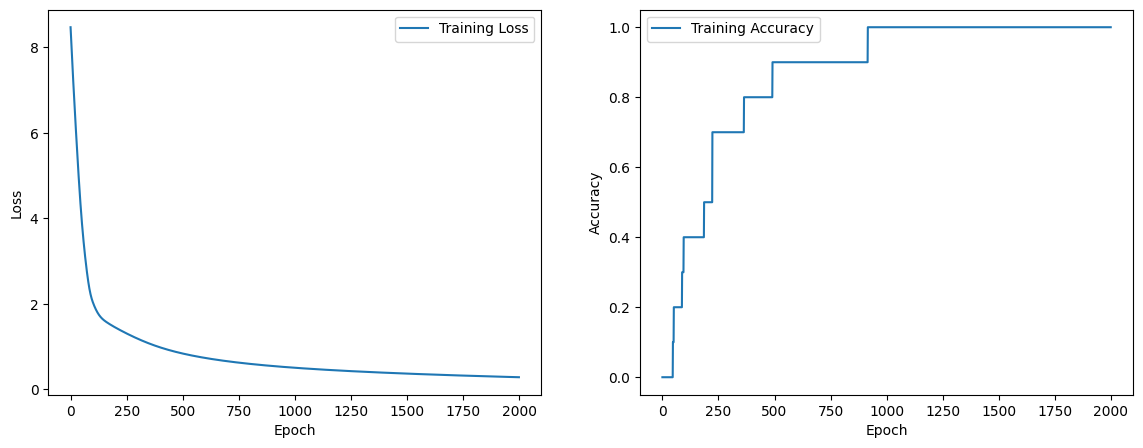

In [29]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].plot(history.history['loss'], label='Training Loss')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].legend()

axes[1].plot(history.history['accuracy'], label='Training Accuracy')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy')
axes[1].legend()

plt.show()

In [30]:
print(f"Check whether a learning of {learning_rate} is fine - the loss decay should be exponential, but not too fast!\n")

Check whether a learning of 0.005 is fine - the loss decay should be exponential, but not too fast!



## Prediction

In [31]:
EfficientTrillianNetReloaded = tf.keras.models.load_model(f'models/ffnn_mnist_lr{learning_rate}_batch{batch_size}_epochs{epochs}.h5')
EfficientTrillianNetReloaded.summary()

loss_and_metrics = EfficientTrillianNetReloaded.evaluate(x_test, y_test, verbose=2)
print(f"\nA prediction with a loss of {loss_and_metrics[0]} and an acccuracy of {loss_and_metrics[1]} is not too bad!\n\n"
      "Let's check how the same architecture performed in an other training:")


FinalEfficientTrillianNet = tf.keras.models.load_model(f'models/final_ffnn_mnist_lr{learning_rate}_batch{batch_size}_epochs{epochs}.h5')
FinalEfficientTrillianNet.summary()

loss_and_metrics = FinalEfficientTrillianNet.evaluate(x_test, y_test, verbose=2)
print(f"\nA prediction with a loss of {loss_and_metrics[0]} and an acccuracy of {loss_and_metrics[1]} is also okey!\n")

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 2)                 0         
                                                                 
 dense (Dense)               (None, 10)                30        
                                                                 
Total params: 30 (120.00 Byte)
Trainable params: 30 (120.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
313/313 - 1s - loss: 1.0718 - accuracy: 0.8494 - 546ms/epoch - 2ms/step

A prediction with a loss of 1.071791648864746 and an acccuracy of 0.849399983882904 is not too bad!

Let's check how the same architecture performed in an other training:
Model: "sequential_48"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_48 (Flat

In [32]:
predictions = EfficientTrillianNetReloaded.predict(x_test)
predictions = np.argmax(predictions, axis=1)
y_test = np.argmax(y_test, axis=1)

print(
    f"Classification report for classifier {EfficientTrillianNetReloaded}:\n"
    f"{metrics.classification_report(y_test, predictions)}\n"
)

313/313 [==============================] - 1s 1ms/step
Classification report for classifier <keras.src.engine.sequential.Sequential object at 0x0000019639F89B50>:
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       980
           1       0.95      0.56      0.70      1135
           2       0.99      0.93      0.96      1032
           3       0.90      0.96      0.93      1010
           4       0.92      0.58      0.71       982
           5       0.90      0.88      0.89       892
           6       0.96      0.89      0.92       958
           7       0.63      0.97      0.76      1028
           8       0.96      0.87      0.91       974
           9       0.68      0.90      0.78      1009

    accuracy                           0.85     10000
   macro avg       0.88      0.85      0.85     10000
weighted avg       0.88      0.85      0.85     10000




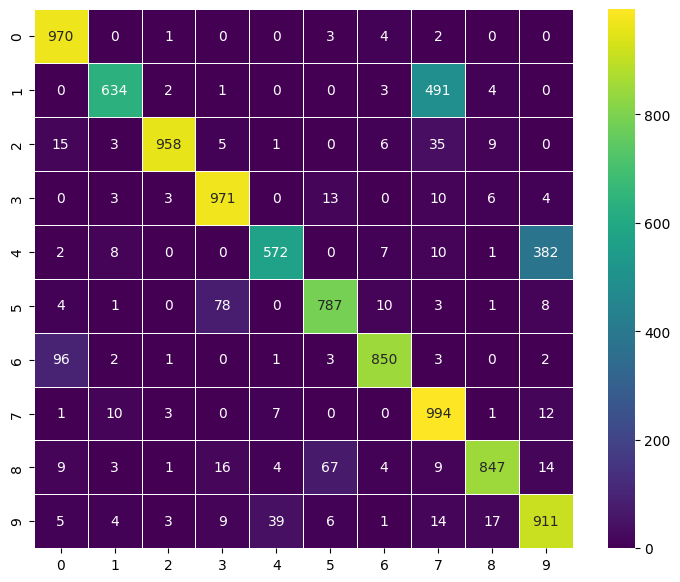

In [33]:
confusion_matrix = tf.math.confusion_matrix(y_test, predictions)

f, ax = plt.subplots(figsize=(9, 7))
sn.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.7,
    fmt="d",
    square=True,
    ax=ax,
    cmap="viridis",
)
plt.show()

## Further experiments

##### Fashion MNIST - Transfer Learning

In [34]:
x_train_fashion_flat = x_train_fashion.reshape((x_train_fashion.shape[0], -1))
x_test_fashion_flat = x_test_fashion.reshape((x_test_fashion.shape[0], -1))

print(f"x_train: {x_train_flat.shape}; y_train: {y_train.shape} \nx_test: {x_test_flat.shape}; y_test: {y_test.shape}")

x_train: (60000, 784); y_train: (10, 10) 
x_test: (10000, 784); y_test: (10000,)


In [35]:
scaler = MinMaxScaler()
x_train_fashion_scaled = scaler.fit_transform(x_train_fashion_flat)
x_test_fashion_scaled = scaler.transform(x_test_fashion_flat)

n_classes = len(np.unique(y_train_fashion))
y_train_fashion_encoded = to_categorical(y_train_fashion, n_classes)
y_test_fashion_encoded = to_categorical(y_test_fashion, n_classes) 

print("The preprocessed data is in shape:\n"
      f"x_train: {x_train_fashion_scaled.shape}; y_train: {y_train_fashion_encoded.shape}\n" 
      f"x_test: {x_test_fashion_scaled.shape}; y_test: {y_test_fashion_encoded.shape}")

The preprocessed data is in shape:
x_train: (60000, 784); y_train: (60000, 10)
x_test: (10000, 784); y_test: (10000, 10)


In [36]:
umap_model = umap.UMAP(n_components=n_components)
x_train_fashion_umap = umap_model.fit_transform(x_train_fashion_scaled)
x_test_fashion_umap = umap_model.transform(x_test_fashion_scaled)

In [37]:
early_stopping = tf.keras.callbacks.EarlyStopping (monitor='val_accuracy',patience=10,mode="max") 

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau (monitor='val_accuracy', factor=0.6, min_delta=0.00005 , 
                                                  patience=5, min_lr=0.0001, mode="max")

model_checkpoint = tf.keras.callbacks.ModelCheckpoint (filepath=f'models/ffnn_fashion_mnist_lr{learning_rate}_batch{batch_size}_epochs{epochs}.h5',
                                                       monitor='val_accuracy',save_best_only=True, mode="max")


In [38]:
x_train, y_train = x_train_fashion_umap, y_train_fashion_encoded
x_test, y_test = x_test_fashion_umap, y_test_fashion_encoded

history = EfficientTrillianNet.fit(
    x_train,
    y_train,
    validation_split=0.2,
    epochs=epochs,
    batch_size=batch_size,
    callbacks=[early_stopping, reduce_lr, model_checkpoint]
)
clear_output()

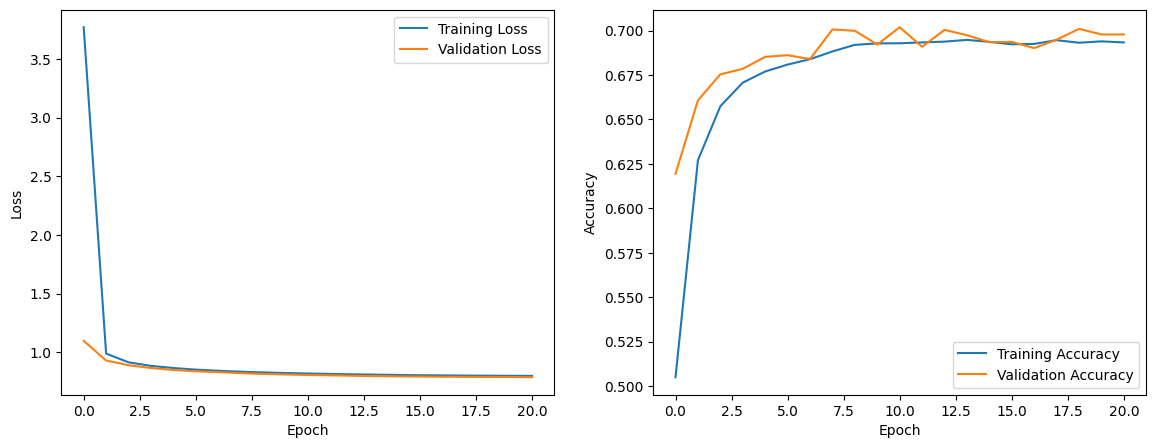

In [39]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].plot(history.history['loss'], label='Training Loss')
axes[0].plot(history.history['val_loss'], label='Validation Loss')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].legend()

axes[1].plot(history.history['accuracy'], label='Training Accuracy')
axes[1].plot(history.history['val_accuracy'], label='Validation Accuracy')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy')
axes[1].legend()

plt.show()

In [40]:
print("The result is not the best - our network is too simple for Fashion MNIST\n"
      "But the generalization looks quite good!")

The result is not the best - our network is too simple for Fashion MNIST
But the generalization looks quite good!


In [41]:
EfficientTrillianNetReloaded = tf.keras.models.load_model(f'models/ffnn_fashion_mnist_lr{learning_rate}_batch{batch_size}_epochs{epochs}.h5')
EfficientTrillianNetReloaded.summary()

loss_and_metrics = EfficientTrillianNetReloaded.evaluate(x_test, y_test, verbose=2)
print(f"\nA prediction with a loss of {loss_and_metrics[0]} and an acccuracy of {loss_and_metrics[1]} is worse than before!\n")

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 2)                 0         
                                                                 
 dense (Dense)               (None, 10)                30        
                                                                 
Total params: 30 (120.00 Byte)
Trainable params: 30 (120.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
313/313 - 1s - loss: 0.8413 - accuracy: 0.6940 - 534ms/epoch - 2ms/step

A prediction with a loss of 0.8412722945213318 and an acccuracy of 0.6940000057220459 is worse than before!



##### CIFAR-10 - Same Method

In [42]:
x_train_cif10_flat = x_train_cif10.reshape((x_train_cif10.shape[0], -1))
x_test_cif10_flat = x_test_cif10.reshape((x_test_cif10.shape[0], -1))

print(f"x_train: {x_train_cif10_flat.shape}; y_train: {y_train_cif10.shape} \nx_test: {x_test_cif10_flat.shape}; y_test: {y_test_cif10.shape}")

x_train: (50000, 3072); y_train: (50000, 1) 
x_test: (10000, 3072); y_test: (10000, 1)


In [43]:
scaler = MinMaxScaler()
x_train_cif10_scaled = scaler.fit_transform(x_train_cif10_flat)
x_test_cif10_scaled = scaler.transform(x_test_cif10_flat)

n_classes = len(np.unique(y_train_cif10))
y_train_cif10_encoded = to_categorical(y_train_cif10, n_classes)
y_test_cif10_encoded = to_categorical(y_test_cif10, n_classes) 

print("The preprocessed data is in shape:\n"
      f"x_train: {x_train_cif10_scaled.shape}; y_train: {y_train_cif10_encoded.shape}\n" 
      f"x_test: {x_test_cif10_scaled.shape}; y_test: {y_test_cif10_encoded.shape}")

The preprocessed data is in shape:
x_train: (50000, 3072); y_train: (50000, 10)
x_test: (10000, 3072); y_test: (10000, 10)


In [44]:
umap_model = umap.UMAP(n_components=n_components)
x_train_cif10_umap = umap_model.fit_transform(x_train_cif10_scaled)
x_test_cif10_umap = umap_model.transform(x_test_cif10_scaled)

In [45]:
EfficientArthurNet = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(n_components,)),
  tf.keras.layers.Dense(10, activation='softmax')
])

EfficientArthurNet.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 2)                 0         
                                                                 
 dense_1 (Dense)             (None, 10)                30        
                                                                 
Total params: 30 (120.00 Byte)
Trainable params: 30 (120.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [46]:
learning_rate = 0.005
EfficientArthurNet.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [47]:
batch_size = 256
epochs = 1000

early_stopping = tf.keras.callbacks.EarlyStopping (monitor='val_accuracy',patience=75,mode="max") 

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau (monitor='val_accuracy', factor=0.6, min_delta=0.00005 , 
                                                  patience=5, min_lr=0.0001, mode="max")

model_checkpoint = tf.keras.callbacks.ModelCheckpoint (filepath=f'models/ffnn_cif10_lr{learning_rate}_batch{batch_size}_epochs{epochs}.h5',
                                                       monitor='val_accuracy',save_best_only=True, mode="max")



In [48]:
x_train, y_train = x_train_cif10_umap, y_train_cif10_encoded
x_test, y_test = x_test_cif10_umap, y_test_cif10_encoded

history = EfficientArthurNet.fit(
    x_train,
    y_train,
    validation_split=0.2,
    epochs=epochs,
    batch_size=batch_size,
    callbacks=[early_stopping, reduce_lr, model_checkpoint])

clear_output()

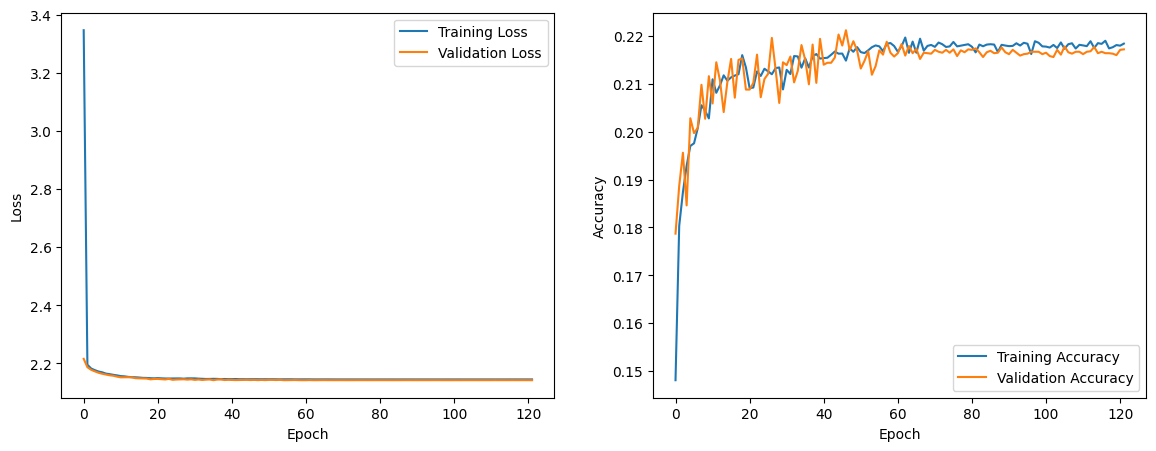

In [49]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].plot(history.history['loss'], label='Training Loss')
axes[0].plot(history.history['val_loss'], label='Validation Loss')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].legend()

axes[1].plot(history.history['accuracy'], label='Training Accuracy')
axes[1].plot(history.history['val_accuracy'], label='Validation Accuracy')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy')
axes[1].legend()

plt.show()

In [50]:
EfficientArthurNetReloaded = tf.keras.models.load_model(f'models/ffnn_cif10_lr{learning_rate}_batch{batch_size}_epochs{epochs}.h5')
EfficientArthurNetReloaded.summary()

loss_and_metrics = EfficientTrillianNetReloaded.evaluate(x_test, y_test, verbose=2)
print(f"\nA prediction with a loss of {loss_and_metrics[0]} and an acccuracy of {loss_and_metrics[1]} is too bad!\n"
      "Other methods such as CNNs would have been meaningful for CIFAR-10...")

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 2)                 0         
                                                                 
 dense_1 (Dense)             (None, 10)                30        
                                                                 
Total params: 30 (120.00 Byte)
Trainable params: 30 (120.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
313/313 - 0s - loss: 11.2333 - accuracy: 0.1142 - 437ms/epoch - 1ms/step

A prediction with a loss of 11.233262062072754 and an acccuracy of 0.11420000344514847 is too bad!
Other methods such as CNNs would have been meaningful for CIFAR-10...


## Time to say Goodbye, thank you for your time! :)